# Correlation
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* sajjad tahghizadeh

*SID:* 810102425

The objective of this notebook is to understand the concept of correlation.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [14]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """
    ######################  TODO  ########################
    covariance_matrix = np.cov(data, rowvar=False) 
    vars = np.var(data, axis=0, ddof=1)  
    correlation_matrix = covariance_matrix / np.sqrt(np.outer(vars, vars))
    return pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)

    ######################  TODO  ########################

ddof=1 

When ddof=1, the standard deviation or variance is calculated for the sample. In this case, one fewer degree of freedom is used to compensate for the error caused by using a sample instead of the entire population. This is a reduction that is made to improve the accuracy of estimating the variance in the samples. In practice, this is most often used for sample data.

rowvar=True

rowvar=True: In this case, each row of data is considered as an observation and each column as a variable. In other words, in this case, the data is considered as "rows as observations" and "columns as variables".

In [15]:
######################  TODO  ########################
df = pd.read_csv('data\energy.csv')
######################  TODO  ########################

### Convert to Datetime and Extract Features

In [16]:
######################  TODO  ########################
df["Datetime"] = pd.to_datetime(df["Datetime"])
######################  TODO  ########################

In [17]:
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Hour"] = df["Datetime"].dt.hour

### Plot Energy Usage Over Years

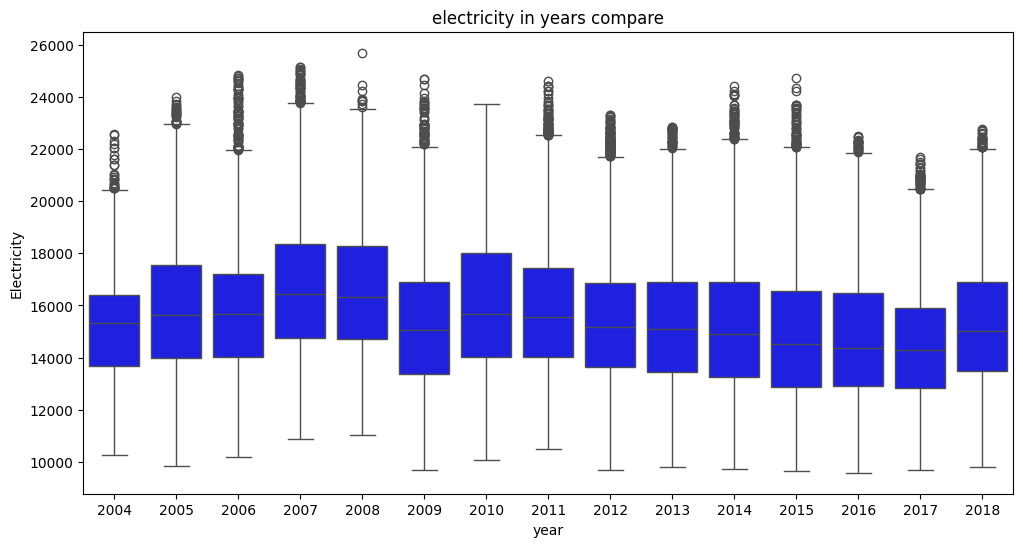

In [18]:
######################  TODO  ########################
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Year", y="AEP_MW",color="blue")
plt.title("electricity in years compare")
plt.xlabel("year")
plt.ylabel("Electricity")
plt.show()
######################  TODO  ########################

### Analyze Energy Usage Over Years

In [19]:
######################  TODO  ########################
df_2004 = df[df["Year"] == 2004]
df_2005 = df[df["Year"] == 2005]
var_2004 = df_2004["AEP_MW"].var()
var_2005 = df_2005["AEP_MW"].var()
print(var_2004)
print(var_2005)
######################  TODO  ########################

4312554.64327797
6609516.545765586


Based on calculations, it appears that the variance in energy consumption was greater in 2005. This could be due to sudden changes in atmospheric temperatures and various other reasons.

### Plot Energy Usage Over Hours

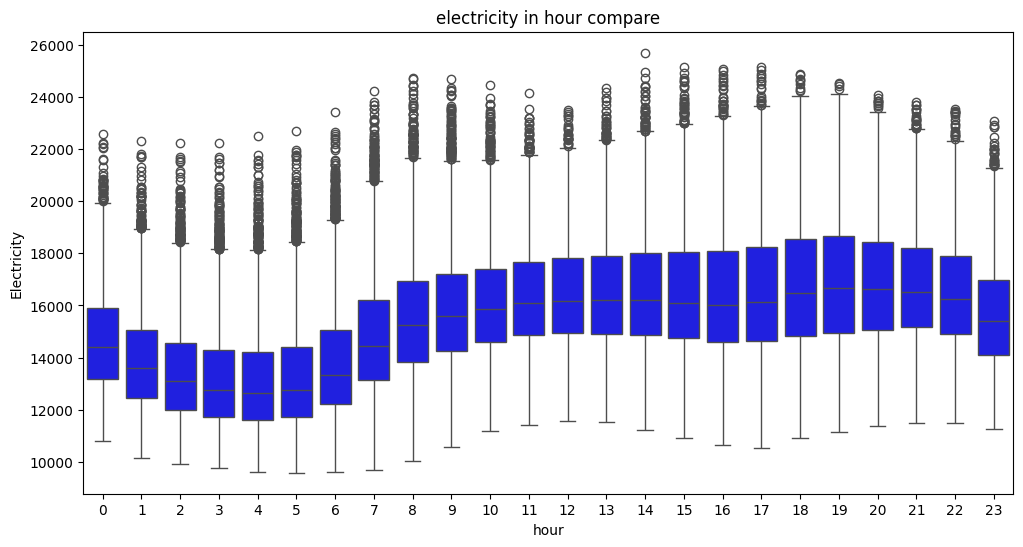

In [20]:
######################  TODO  ########################
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Hour", y="AEP_MW",color="blue")
plt.title("electricity in hour compare")
plt.xlabel("hour")
plt.ylabel("Electricity")
plt.show()
######################  TODO  ########################

This graph shows that as it gets closer to darkness and night falls, energy consumption increases. This is logical because it is dark and the lights and appliances, as well as the occasional heating appliances, have a direct impact on energy consumption.

### Plot Energy Usage Over Months

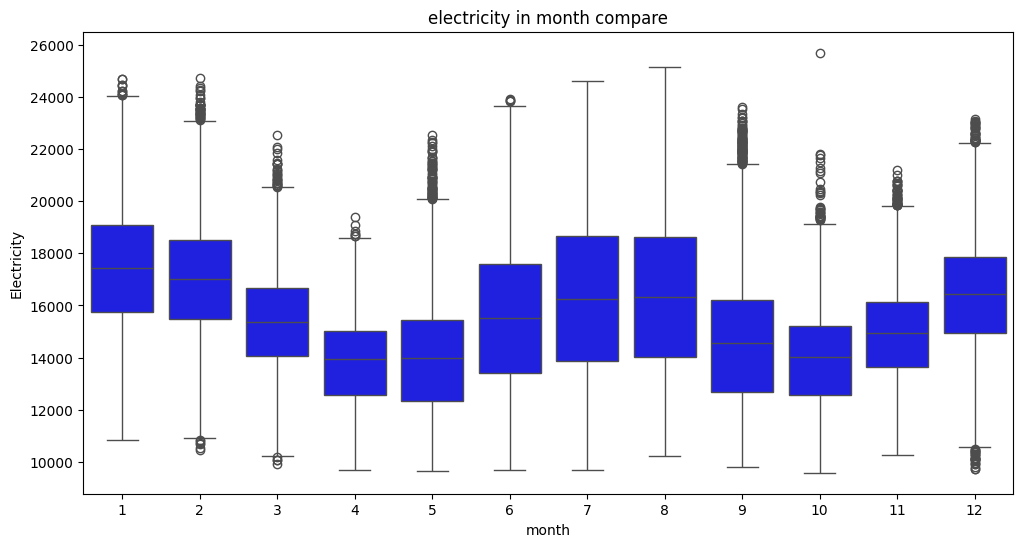

In [21]:
######################  TODO  ########################
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Month", y="AEP_MW",color="blue")
plt.title("electricity in month compare")
plt.xlabel("month")
plt.ylabel("Electricity")
plt.show()
######################  TODO  ########################


Based on the graph, it can be concluded that in the hot and cold months of the year, that is, in the winter and summer seasons, due to the large increase and decrease in temperature, people's energy consumption has increased, but in the autumn and spring seasons, due to the balanced temperature, energy consumption has not been very high.

### Calculate Correlation Between Specific Hours and Energy Usage

In [22]:
######################  TODO  ########################
df_new = df[(df["Hour"] >= 4) & (df["Hour"] <= 13)]
data_new = df_new[["Hour", "AEP_MW"]]
correlation_matrix = correlation(data_new)
correlation_matrix
######################  TODO  ########################

,Hour,AEP_MW
Hour,1.000000,0.471379
AEP_MW,0.471379,1.000000


Yes, it is somewhat consistent because as the hours increase from 4 to 13, as can be seen in the graph, we have also seen an increase in energy consumption. This positive correlation coefficient that was obtained can be evidence of this claim.

### Analyze Correlation Between Specific Hours and Energy Usage

TODO

In [26]:
df_new1 = df[(df["Month"] >= 2) & (df["Month"] <= 4)]
df_new2 = df[(df["Month"] >= 10) & (df["Month"] <= 12)]

data_2_4 = df_new1[["Month", "AEP_MW"]]
data_10_12 = df_new2[["Month", "AEP_MW"]]

correlation_2_4 = correlation(data_2_4)

correlation_10_12 = correlation(data_10_12)

print(correlation_2_4) 

correlation_10_12

           Month    AEP_MW
Month   1.000000 -0.558245
AEP_MW -0.558245  1.000000


,Month,AEP_MW
Month,1.000000,0.473838
AEP_MW,0.473838,1.000000


As we know, the second to fourth months of the year are the warm months of the year. As a result, it can be said that their correlation is negative because as the temperature gets warmer, electricity and energy consumption decreases. On the contrary, in the tenth or twelfth months of the year, due to the colder weather, the consumption and use of heating devices increases. Their correlation is positive and they have an almost direct relationship with each other.

## Causal Effect

In [24]:
df2 = pd.read_csv('data\TV_LE_Physician.csv')
data2 = df2[["Life Expectancy (years)", "Physicians per 1000 people", "Televisions per 1000 people"]]
cor_new = correlation(data2)
cor_new

,Life Expectancy (years),Physicians per 1000 people,Televisions per 1000 people
Life Expectancy (years),1.000000,0.628805,0.025875
Physicians per 1000 people,0.628805,1.000000,0.008602
Televisions per 1000 people,0.025875,0.008602,1.000000


Relationship between Life Expectancy (years) and Physicians per 1000 people

Correlation Coefficient 0.628805

This correlation coefficient is positive and relatively strong indicating that there is a positive relationship between the number of physicians per 1000 people and life expectancy That is countries with a higher number of physicians tend to have higher life expectancy

Relationship between Life Expectancy (years) and Televisions per 1000 people

Correlation Coefficient 0.025875

This correlation coefficient is close to zero indicating that there is a weak or almost no relationship between the number of televisions and life expectancy

Relationship between Physicians per 1000 people and Televisions per 1000 people

Correlation coefficient 0.008602

This is also a correlation coefficient very close to zero indicating that there is no significant relationship between the number of physicians and the number of televisions

A causal relationship cannot be proven using a correlation coefficient alone The correlation coefficient indicates a statistical relationship not cause and effect Further research and experimental tests are needed to prove a causal relationship
For example an increase in the number of doctors in a country may increase life expectancy but this relationship does not necessarily mean cause and effect
Also a low correlation coefficient between Televisions per 1000 people and Life Expectancy indicates that there is no significant relationship between the two variables This could mean that televisions have no effect on life expectancy or that the effect is statistically very weak